Accuracy: 0.5099108335663467
ROC-AUC: 0.7054113053189041

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.07      0.13     33881
           1       0.49      1.00      0.66     30493

    accuracy                           0.51     64374
   macro avg       0.73      0.53      0.40     64374
weighted avg       0.75      0.51      0.38     64374



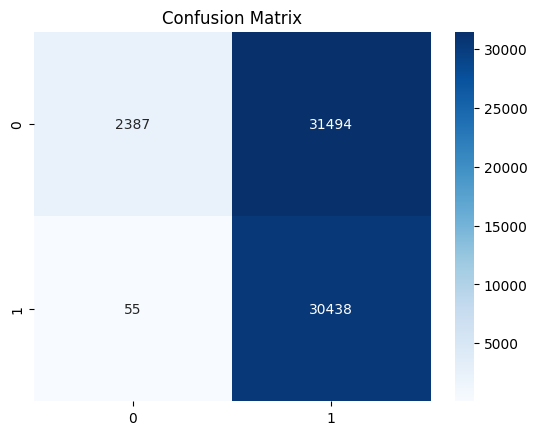

In [1]:
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Load model artifacts
rf = joblib.load("rf_model.pkl")
scaler = joblib.load("scaler.pkl")
label_encoders = joblib.load("label_encoders.pkl")
feature_names = joblib.load("feature_names.pkl")   # <-- VERY IMPORTANT

# Load processed test data
test = pd.read_csv("test_processed.csv")

X_test = test.drop("Churn", axis=1)
y_test = test["Churn"]

# ---------------------------
# Apply encoders to test data
# ---------------------------
X_test_encoded = X_test.copy()

for col, le in label_encoders.items():
    if col in X_test_encoded.columns:
        X_test_encoded[col] = le.transform(X_test_encoded[col].astype(str))

# ---------------------------
# Align columns EXACTLY like training
# ---------------------------
# Add any missing columns
for col in feature_names:
    if col not in X_test_encoded.columns:
        X_test_encoded[col] = 0

# Remove unexpected columns
X_test_encoded = X_test_encoded[feature_names]

# ---------------------------
# Scale
# ---------------------------
X_test_scaled = scaler.transform(X_test_encoded)

# ---------------------------
# Predictions
# ---------------------------
y_pred = rf.predict(X_test_scaled)
y_proba = rf.predict_proba(X_test_scaled)[:, 1]

# ---------------------------
# Metrics
# ---------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
